<a href="https://colab.research.google.com/github/kamilarakhimova/hse-cvt/blob/main/Exercise1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

You can download CIFAR10 dataset from official site: https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [1]:
classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

*First of all, let's import necessary libraries and declare constants.*

In [2]:
import torch
import torchvision
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
random.seed(42)
RANDOM_STATE = 42

*Next, we download a train part of the dataset.*

In [4]:
training_data = torchvision.datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
)

100%|██████████| 170498071/170498071 [00:02<00:00, 62505516.70it/s]


Extracting data/cifar-10-python.tar.gz to data


In [5]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train

## Split data into train and validation parts

Extract subset containing train and validation parts.
Part must contain 5000 and 500 samples respectively.

In [6]:
# Train data 5000 samples
X_train = training_data.data[:5000]
y_train = training_data.targets[:5000]

# Validation data 500 samples
X_val = training_data.data[5000:5500]
y_val = training_data.targets[5000:5500]

In [7]:
len(X_train), len(y_train), len(X_val), len(y_val)

(5000, 5000, 500, 500)

## Display some images along with their class names
  


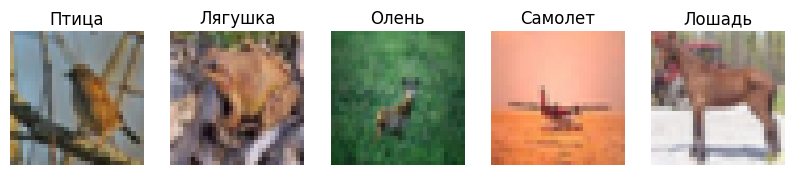

In [8]:
random.seed(42)

# choose 5 (pseudo)random indexes
indexes = random.sample(range(5000), 5)

# show selected images
fig, axes = plt.subplots(1, 5, figsize = (10, 3))
for ax, i in zip(axes, indexes):
    image, target = X_train[i], y_train[i]

    # removing frames around images
    ax.set_axis_off()

    ax.imshow(image)
    ax.set_title(classes[y_train[i]])


# Implement NearestNeighbor class

*Here are several methods for calculating distance between vectors of two images (a, b).*

In [9]:
def L1_dist(a, b):
  summ = 0
  for i in range(len(a)):
    for j in range(len(a[i])):
      for k in range(len(a[i][j])):
        summ += abs(int(a[i][j][k]) - int(b[i][j][k]))
  return summ


*And here is an example of the Nearest Neighbor algorithm.*

In [10]:
class NearestNeighbor:
  def __init__(self):
    self.points = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

  def fit(self, x, y):
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from trainset (batch)
        y  (Tensor or numpy.array): collection of integer
        representing a class number for objects from x

    """
    for i in range(len(y)):
      self.points[y[i]].append(x[i])

  def predict(self, x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)

      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x
    """
    labels = []

    for point in x:
      distances = []
      for class_num in self.points:
        for sample in self.points[class_num]:
          distances.append((L1_dist(point, sample), class_num))

      nn_dist, nn_class_num = min(distances)
      labels.append(nn_class_num)

    return labels


##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [ ]:
%%time

model_nn = NearestNeighbor()
model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
    print(f"Prediction: {classes[label]} vs Target: {classes[y_val[i]]}")

Prediction: Лошадь vs Target: Лягушка
Prediction: Корабль vs Target: Лошадь
Prediction: Автомобиль vs Target: Грузовик
Prediction: Собака vs Target: Самолет
Prediction: Лягушка vs Target: Собака
Prediction: Олень vs Target: Птица
Prediction: Птица vs Target: Кошка
Prediction: Олень vs Target: Кошка
Prediction: Лягушка vs Target: Кошка
CPU times: user 3min 13s, sys: 414 ms, total: 3min 14s
Wall time: 3min 22s


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [11]:
def validate(model, x, y):
  """
      Arguments:
          model (Object): instance of NearestNeighbor class
          x (Tensor or numpy.array): collection of objects
          y (Tensor or numpy.array): collection of integer representing
          class numbers for objects from x

      Returns:
          accuracy (float) : percentage of correctly classified objects
    """
  preds = model.predict(x)

  true_pred = 0

  for i in range(len(y)):
    if y[i] == preds[i]:
      true_pred += 1

  accuracy =  true_pred / len(y)
  return accuracy

 ## Calculate model accuracy on validation data

In [ ]:
%%time

accuracy = validate(model_nn, X_val, y_val)
print ("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.260
CPU times: user 2h 53min 57s, sys: 17.5 s, total: 2h 54min 14s
Wall time: 2h 55min 47s


# Place for brief conclusion
*Algorithm takes too much time and works very bad, because it makes decisions only based on one nearest neighbor. It does not pay attention to a relative location of pixels at all.*


# Ideas for extra work

- Implement K-NearestNeighbor ✅
- Test different distance functions ✅
- Evaluate time ✅ *(did it earlier)*

## Implement kNearestNeighbors class

*Here is an example of the KNN (K-Nearest Neighbors) algorithm.*

In [12]:
class kNearestNeighbors:
  def __init__(self, k=1): # You can change the method signature
    self.k = k
    self.points = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

  def fit(self, x, y): # You can change the method signature
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from trainset (batch)
        y  (Tensor or numpy.array): collection of integer
        representing a class number for objects from x

    """
    for i in range(len(y)):
      self.points[y[i]].append(x[i])

  def predict(self, x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)

      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x
    """
    labels = []

    for point in x:
      distances = []
      for class_num in self.points:
        for sample in self.points[class_num]:
          distances.append((L1_dist(point, sample), class_num))

      nns = sorted(distances)[:self.k]

      freqs = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

      for nn in nns:
        nn_dist, nn_class_num = nn
        freqs[nn_class_num] += 1

      max_freq, max_class_num = 0, 0
      for class_num in freqs:
        if freqs[class_num] > max_freq:
          max_freq = freqs[class_num]
          max_class_num = class_num

      labels.append(max_class_num)

    return labels


*Next let's perform a smoke test.*

In [ ]:
%%time

# k nearest neighbors = 10
model_nn = kNearestNeighbors(k=10)
model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
    print(f"Prediction: {classes[label]} vs Target: {classes[y_val[i]]}")

Prediction: Лягушка vs Target: Лягушка
Prediction: Грузовик vs Target: Лошадь
Prediction: Автомобиль vs Target: Грузовик
Prediction: Олень vs Target: Самолет
Prediction: Лягушка vs Target: Собака
Prediction: Лягушка vs Target: Птица
Prediction: Птица vs Target: Кошка
Prediction: Олень vs Target: Кошка
Prediction: Самолет vs Target: Кошка
CPU times: user 3min 4s, sys: 312 ms, total: 3min 4s
Wall time: 3min 5s


## Write and test another distance function

*Here is a function that calculates Euclidean/L2-distance.*

In [13]:
def L2_dist(a, b):
  summ = 0
  for i in range(len(a)):
    for j in range(len(a[i])):
      for k in range(len(a[i][j])):
        summ += (int(a[i][j][k]) - int(b[i][j][k])) ** 2
  return summ ** 0.5

*Let's test it on the NearestNeighbor algorithm version 2 (calculates L2-distance instead of L1-distance).*



In [14]:
class NearestNeighbor2:
  def __init__(self):
    self.points = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

  def fit(self, x, y):
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from trainset (batch)
        y  (Tensor or numpy.array): collection of integer
        representing a class number for objects from x

    """
    for i in range(len(y)):
      self.points[y[i]].append(x[i])

  def predict(self, x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)

      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x
    """
    labels = []

    for point in x:
      distances = []
      for class_num in self.points:
        for sample in self.points[class_num]:
          distances.append((L2_dist(point, sample), class_num))

      nn_dist, nn_class_num = min(distances)
      labels.append(nn_class_num)

    return labels


*Performing a smoke test.*

In [ ]:
%%time

model_nn = NearestNeighbor2()
model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_val[0:9])
for i, label in enumerate(predicted_labels):
    print(f"Prediction: {classes[label]} vs Target: {classes[y_val[i]]}")

Prediction: Лошадь vs Target: Лягушка
Prediction: Грузовик vs Target: Лошадь
Prediction: Птица vs Target: Грузовик
Prediction: Собака vs Target: Самолет
Prediction: Лягушка vs Target: Собака
Prediction: Лягушка vs Target: Птица
Prediction: Олень vs Target: Кошка
Prediction: Олень vs Target: Кошка
Prediction: Самолет vs Target: Кошка
CPU times: user 3min 42s, sys: 333 ms, total: 3min 42s
Wall time: 3min 44s
